<a href="https://colab.research.google.com/github/runeking2006/vac_1/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LINEAR REGRESSION

In [ ]:
#IMPORTING MODULES AND ESSENTIALS
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#CREATING DATAFRAME
df=pd.DataFrame({'Size':[1500,1700,1800,2000],'Bedrooms':[3,3,4,4],
                 'Price':[300000,350000,370000,400000]})

x=df[['Size','Bedrooms']]
y=df['Price']
#SPLITTING TESTING AND TRAINING DATA
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
#TRAINING MODEL
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
#PREDICTING PRICES
y_pred=model.predict(x_test)
print("predicted prices:",y_pred)
x_test

predicted prices: [350000.]


,Size,Bedrooms
2,1800,4


In [ ]:
#MODEL EVALUATION
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error:",mse)

Mean Squared Error: 399999999.9999977


#canada_per_capita_income

In [ ]:
# IMPORTING MODULES AND LOADING DATASET
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/canada_per_capita_income.csv")

<function matplotlib.pyplot.show(close=None, block=None)>

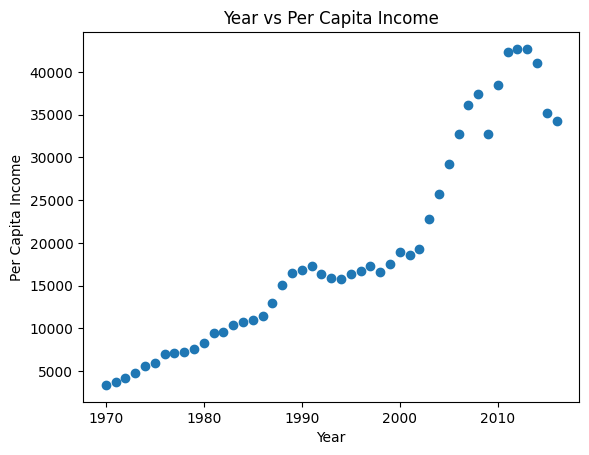

In [ ]:
#VISUALIZING
import matplotlib.pyplot as plt
plt.scatter(data['year'],data['per capita income (US$)'])
plt.title('Year vs Per Capita Income')
plt.xlabel('Year')
plt.ylabel('Per Capita Income')
plt.show

In [ ]:
#IMPORTING MODEL FOR BUILDING
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
x=data['year']
y=data['per capita income (US$)']

In [ ]:
x_train_canada, x_test_canada, y_train_canada, y_test_canada = train_test_split(x, y, test_size=0.2)

In [ ]:
model_canada = LinearRegression()
model_canada.fit(x_train_canada.values.reshape(-1, 1), y_train_canada)

LinearRegression()

In [ ]:
y_pred_canada = model_canada.predict(x_test_canada.values.reshape(-1, 1))
print("Predicted per capita incomes:", y_pred_canada)

Predicted per capita incomes: [37046.06300402   468.34419368 18331.8812871  28539.61676905
 26838.32752206 15779.94741661 23435.74902808  8124.14580515
 20033.17053409  1318.98881718]


In [ ]:
mse_canada = mean_squared_error(y_test_canada, y_pred_canada)
print("Mean Squared Error (Canada per capita income):", mse_canada)

Mean Squared Error (Canada per capita income): 17011812.692551948


#LOGISTIC REGRESSION

In [ ]:
#IMPORTING MODEL FOR BUILDING
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [ ]:
#CREATING DATAFRAME
import pandas as pd

data_new = {'Study_Hours': [30, 25, 20, 15],
            'Attendance': [80, 85, 60, 80],
            'Result': [1, 1, 0, 0]}
df_new = pd.DataFrame(data_new)
df_new

,Study_Hours,Attendance,Result
0,30,80,1
1,25,85,1
2,20,60,0
3,15,80,0


In [ ]:
# Define features (X) and target (y)
X = df_new[['Study_Hours', 'Attendance']]
y = df_new['Result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
# Initialize the Logistic Regression model
model_logistic = LogisticRegression(random_state=42)

# Train the model using the training data
model_logistic.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


In [ ]:
# Make predictions on the test set
y_pred_logistic = model_logistic.predict(X_test)

print("Predicted results:", y_pred_logistic)

Predicted results: [1]


In [ ]:
#MODEL EVALUATION
mse=mean_squared_error(y_test,y_pred_logistic)
print("Mean Squared Error:",mse)

Mean Squared Error: 0.0


#KNN

In [286]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

In [287]:
iris=load_iris()
x=iris.data
y=iris.target

In [288]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#n_neighbors=3

In [289]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [290]:
y_pred  = knn.predict(x_test)
print(y_pred)

[2 0 2 0 0 1 1 2 1 2 2 0 2 2 2 0 0 1 0 0 2 1 0 1 2 1 0 1 1 2]


In [291]:
accuracy = accuracy_score(y_test, y_pred)
accuracy=accuracy*100
print(f"Accuracy:{accuracy}%")

Accuracy:90.0%


#n_neighbors=5

In [275]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [276]:
y_pred  = knn.predict(x_test)
print(y_pred)

[0 1 0 0 2 0 1 0 0 2 1 0 0 1 0 1 0 2 1 1 1 0 0 1 1 2 2 0 2 2]


In [277]:
accuracy = accuracy_score(y_test, y_pred)
accuracy=accuracy*100
print(f"Accuracy:{accuracy}%")

Accuracy:100.0%


#STRATIFIED CROSS-VALIDATION [FOR N_NEIGHBOURS=3]

In [292]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np # Import numpy for mean and std

# Ensure x and y correspond to the iris dataset
# Assuming iris.data and iris.target are still available from previous cells
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = []

for train_index, test_index in skf.split(iris.data, iris.target):
    x_train_fold, x_test_fold = iris.data[train_index], iris.data[test_index]
    y_train_fold, y_test_fold = iris.target[train_index], iris.target[test_index]

    knn_fold = KNeighborsClassifier(n_neighbors=5)
    knn_fold.fit(x_train_fold, y_train_fold)

    y_pred_fold = knn_fold.predict(x_test_fold)
    accuracy = accuracy_score(y_test_fold, y_pred_fold)
    accuracy_scores.append(accuracy)

print("Accuracy scores for each fold:", accuracy_scores)
print("Mean accuracy:", np.mean(accuracy_scores))
print("Standard deviation of accuracy:", np.std(accuracy_scores))
print(f"Final Accuracy: {(np.mean(accuracy_scores)*100):.2f}%")

Accuracy scores for each fold: [1.0, 0.9666666666666667, 0.9333333333333333, 1.0, 0.9333333333333333]
Mean accuracy: 0.9666666666666668
Standard deviation of accuracy: 0.029814239699997188
Final Accuracy: 96.67%


#POLYNOMIAL

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a synthetic dataset
np.random.seed(0)
X_poly = np.sort(5 * np.random.rand(80, 1), axis=0)
y_poly = np.sin(X_poly).ravel() + 0.1 * np.random.randn(80)

# Convert to DataFrame for easier handling, if preferred, or keep as numpy arrays
df_poly = pd.DataFrame({'X': X_poly.flatten(), 'y': y_poly})

print("Synthetic DataFrame created:")
display(df_poly.head())

Synthetic DataFrame created:


,X,y
0,0.093949,0.012496
1,0.101092,-0.071708
2,0.195939,0.212430
3,0.301127,0.256419
4,0.355180,0.184740


#degree=2

In [118]:
# Generate polynomial features (e.g., degree 2)
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_poly_features = poly_features.fit_transform(X_poly)

# Split the data into training and testing sets
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly_features, y_poly, test_size=0.2, random_state=42)

print(f"Polynomial features generated with degree {degree}.")
print("Shape of X_train_poly:", X_train_poly.shape)
print("Shape of X_test_poly:", X_test_poly.shape)

Polynomial features generated with degree 2.
Shape of X_train_poly: (64, 3)
Shape of X_test_poly: (16, 3)


In [120]:
# Train a Linear Regression model on the polynomial features
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train_poly)

LinearRegression()

In [121]:
# Make predictions on the test set
y_pred_poly = model_poly.predict(X_test_poly)

print("Predictions on the test set:")
print(y_pred_poly)


Predictions on the test set:
[ 0.65990021  0.41819487  0.70173026  0.62872057  0.67548093  0.67538577
  0.59485802 -0.75595424  0.52133158  0.59745322  0.24206855  0.60134816
 -0.52329419  0.59926991 -0.57665327  0.35575472]


In [127]:
# Evaluate the model
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)

print(f"Mean Squared Error (Polynomial Regression): {mse_poly}")
print(f"R-squared (Polynomial Regression) Score: {r2_poly:.2f}")
print(f"R-squared (Polynomial Regression)Score in %:{r2_poly*100}%")

Mean Squared Error (Polynomial Regression): 0.0769704820341855
R-squared (Polynomial Regression) Score: 0.84
R-squared (Polynomial Regression)Score in %:83.80074168735851%


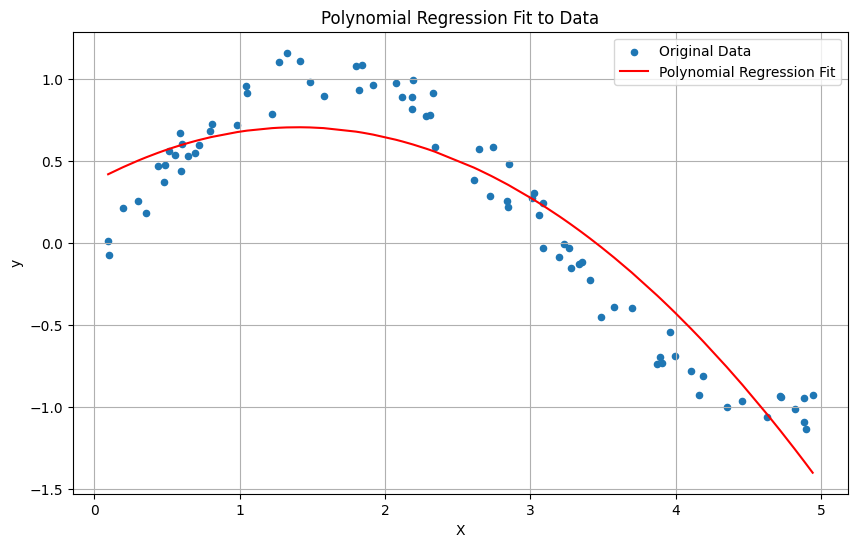

In [128]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_poly, y_poly, s=20, label='Original Data')
plt.plot(X_poly, model_poly.predict(poly_features.fit_transform(X_poly)), color='red', label='Polynomial Regression Fit')
plt.title('Polynomial Regression Fit to Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

#degree=3

In [170]:
# Generate polynomial features (e.g., degree 2)
degree = 3
poly_features = PolynomialFeatures(degree=degree)
X_poly_features = poly_features.fit_transform(X_poly)

# Split the data into training and testing sets
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly_features, y_poly, test_size=0.2, random_state=42)

print(f"Polynomial features generated with degree {degree}.")
print("Shape of X_train_poly:", X_train_poly.shape)
print("Shape of X_test_poly:", X_test_poly.shape)

Polynomial features generated with degree 3.
Shape of X_train_poly: (64, 4)
Shape of X_test_poly: (16, 4)


In [171]:
# Train a Linear Regression model on the polynomial features
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train_poly)

LinearRegression()

In [172]:
# Make predictions on the test set
y_pred_poly = model_poly.predict(X_test_poly)

print("Predictions on the test set:")
print(y_pred_poly)


Predictions on the test set:
[ 0.93373135 -0.17352838  1.01235604  0.86114045  0.90523261  0.97024876
  0.58182594 -0.88306164  0.27503231  0.59244104  0.11947939  0.79904656
 -0.74066475  0.7943993  -0.77766028  0.31027737]


In [173]:
# Evaluate the model
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)

print(f"Mean Squared Error (Polynomial Regression): {mse_poly}")
print(f"R-squared (Polynomial Regression) Score: {r2_poly:.2f}")
print(f"R-squared (Polynomial Regression)Score in %:{r2_poly*100}%")

Mean Squared Error (Polynomial Regression): 0.012922822572814883
R-squared (Polynomial Regression) Score: 0.97
R-squared (Polynomial Regression)Score in %:97.28025425522881%


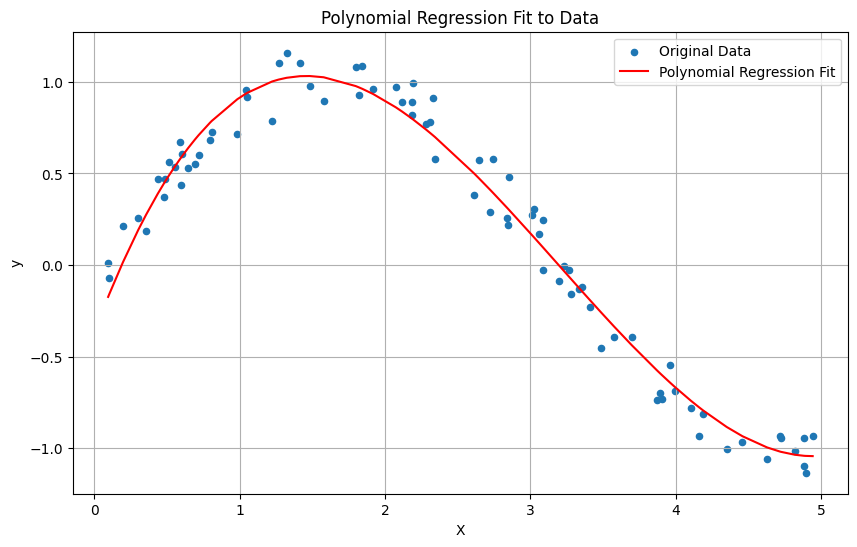

In [174]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_poly, y_poly, s=20, label='Original Data')
plt.plot(X_poly, model_poly.predict(poly_features.fit_transform(X_poly)), color='red', label='Polynomial Regression Fit')
plt.title('Polynomial Regression Fit to Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

#naive bayes classifier

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score,classification_report

In [144]:
emails = [
    "Congratulations! You’ve won a $1,000 Amazon gift card. Click here to claim your prize now!",   # spam
    "Urgent! Your bank account has been compromised. Verify your details immediately to avoid suspension.",  # spam
    "Earn $5000 per week working from home. No experience required. Sign up today!",  # spam
    "Limited time offer! Get 90% off luxury watches. Buy now before stock runs out!",  # spam
    "Your Amazon order has been shipped and will arrive by Friday.",  # not spam
    "Team meeting scheduled for tomorrow at 10 AM. Please be on time.",  # not spam
    "Dear user, your email has won our lottery draw. Send your personal details to receive winnings.",  # spam
    "Lose weight fast with this miracle pill. Doctors hate this secret. Order now!",  # spam
    "Final notice: Your loan has been approved. Click here to receive cash instantly.",  # spam
    "Can you please review the attached report and share your feedback?"  # not spam
]


In [145]:
labels = [1, 1, 1, 1, 0, 0, 1, 1, 1, 0]


In [146]:
vectorizer=CountVectorizer()
x=vectorizer.fit_transform(emails)

In [147]:
x_train,x_test,y_train,y_test=train_test_split(x,labels,test_size=0.3,random_state=42)

In [148]:
nb_classifier=MultinomialNB()
nb_classifier.fit(x_train,y_train)

MultinomialNB()

In [150]:
y_pred=nb_classifier.predict(x_test)
print(y_pred)

[0 0 0]


In [163]:
accuracy=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred,target_names=['Not Spam','Spam'])
print(f"Accuracy:{accuracy:.2f}")
accuracy_percentage=accuracy*100
print(f"Accuracy Percentage:{accuracy_percentage:.2f}%")
print("Classification Report:\n",report)

Accuracy:0.33
Accuracy Percentage:33.33%
Classification Report:
               precision    recall  f1-score   support

    Not Spam       0.33      1.00      0.50         1
        Spam       0.00      0.00      0.00         2

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#ADVERTISING ANALYSIS

In [178]:
import pandas as pd
dataset=pd.read_csv("/content/drive/MyDrive/advertising (1).csv")
dataset

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


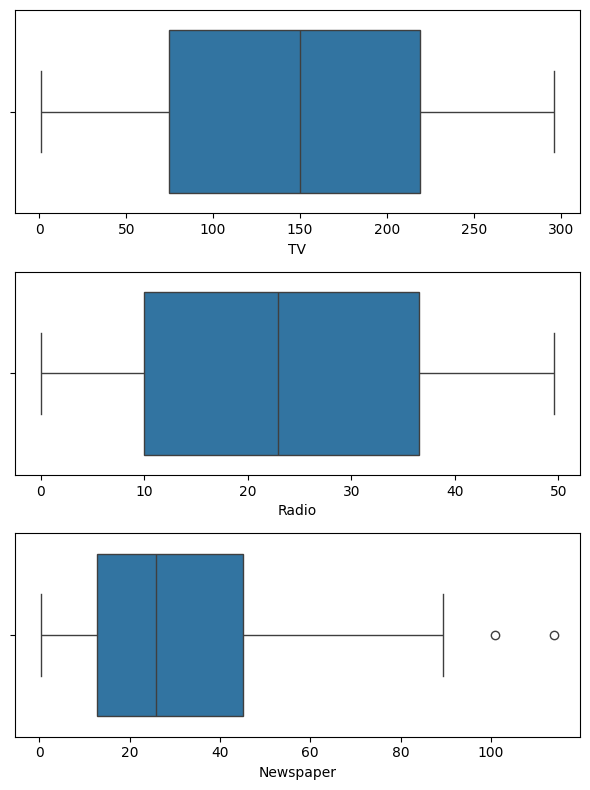

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,axs=plt.subplots(3,figsize=(6,8))
sns.boxplot(x=dataset['TV'],ax=axs[0])
sns.boxplot(x=dataset['Radio'],ax=axs[1])
sns.boxplot(x=dataset['Newspaper'],ax=axs[2])

plt.tight_layout()
plt.show()

In [195]:
Q1=dataset['Newspaper'].quantile(0.25)
Q3=dataset['Newspaper'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

filtered_data=dataset[(dataset['Newspaper']>=lower_bound)&(dataset['Newspaper']<=upper_bound)]

print(filtered_data)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[198 rows x 4 columns]


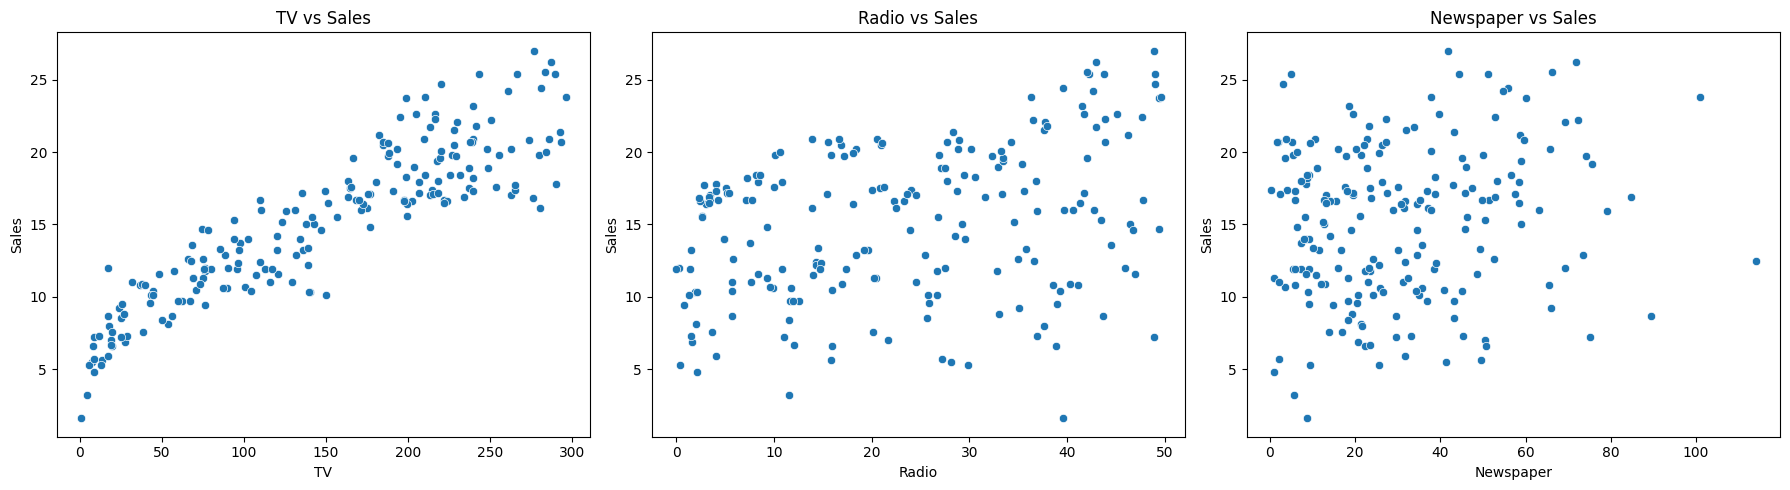

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(x=dataset['TV'], y=dataset['Sales'], ax=axes[0])
axes[0].set_title('TV vs Sales')

sns.scatterplot(x=dataset['Radio'], y=dataset['Sales'], ax=axes[1])
axes[1].set_title('Radio vs Sales')

sns.scatterplot(x=dataset['Newspaper'], y=dataset['Sales'], ax=axes[2])
axes[2].set_title('Newspaper vs Sales')

plt.tight_layout()
plt.show()

In [197]:
# Define features (X_tv) and target (y_tv) for TV advertising
X_tv = filtered_data[['TV']]
y_tv = filtered_data['Sales']

In [198]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train_tv, X_test_tv, y_train_tv, y_test_tv = train_test_split(X_tv, y_tv, test_size=0.2, random_state=42)

In [203]:
# Initialize and train the Linear Regression model for TV
from sklearn.linear_model import LinearRegression
model_tv = LinearRegression()
model_tv.fit(X_train_tv, y_train_tv)

LinearRegression()

In [204]:
# Make predictions on the test set for TV
y_pred_tv = model_tv.predict(X_test_tv)

print("Predicted Sales based on TV advertising:")
print(y_pred_tv)

Predicted Sales based on TV advertising:
[ 8.75470616 14.67285535 22.4867905  12.77157437  7.66668987 19.1293261
 19.14031616 13.227662   15.11795292 22.64614642 16.50270092 17.76106319
  7.42490848 14.5080044  11.22197541 11.95281464  7.45238363 18.00284459
  9.48005035 11.21648038 11.15054    16.00814807 21.38228911  8.05134209
 18.75016891 18.93699999  8.05683713 19.90962061  8.08980732 16.37631519
 17.96437937 13.64528441 11.43078662 10.78237287 21.47020962 16.18948411
 17.18408486 16.27740462 19.02492049 17.88195389]


In [205]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse_tv = mean_squared_error(y_test_tv, y_pred_tv)
r2_tv = r2_score(y_test_tv, y_pred_tv)

print(f"Mean Squared Error for TV model: {mse_tv:.2f}")
print(f"R-squared for TV model: {r2_tv:.2f}")

Mean Squared Error for TV model: 4.95
R-squared for TV model: 0.82
